# EDA

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

sns.set_palette('viridis')

## Load dataset

In [2]:
df = pd.read_csv('../data/prepared.csv')
df.head()

,movie,year,category,nominee,bafta,globe,oscar,rated,runtime,director,...,musical,romance,music,action,drama,comedy,sport,history,animation,thriller
0,Raging Bull,1980,actor,Robert De Niro,0,1,1,R,129,Martin Scorsese,...,0,0,0,0,1,0,1,0,0,0
1,Raging Bull,1980,director,Martin Scorsese,0,0,0,R,129,Martin Scorsese,...,0,0,0,0,1,0,1,0,0,0
2,Raging Bull,1980,picture,Raging Bull,0,0,0,R,129,Martin Scorsese,...,0,0,0,0,1,0,1,0,0,0
3,The Great Santini,1980,actor,Robert Duvall,0,0,0,PG,115,Lewis John Carlino,...,0,0,0,0,1,0,0,0,0,0
4,The Elephant Man,1980,actor,John Hurt,1,0,0,PG,124,David Lynch,...,0,0,0,0,1,0,0,0,0,0


## Explore data

### Top nominated genres

In [3]:
non_genres = [
    'movie', 'year', 'category', 'nominee',
    'bafta', 'oscar', 'globe', 'rated', 'runtime', 'director', 
    'language', 'imdb_score', 'imdb_votes', 'rt_score', 
    'metascore', 'other_win', 'other_nom'
]
genres = [el for el in df.columns if el not in non_genres]

In [4]:
genres_count = df[genres].sum(axis=0).sort_values(axis=0, ascending=False)

<AxesSubplot:>

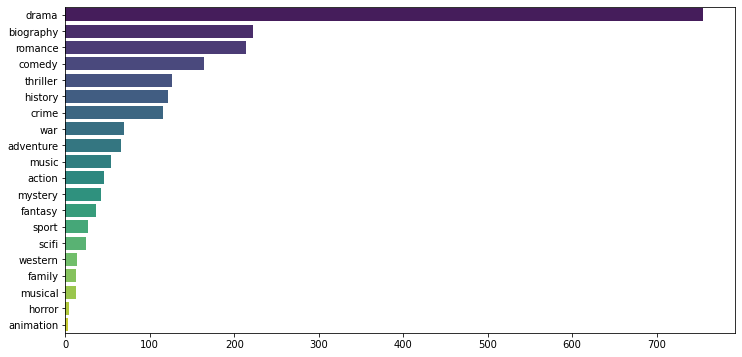

In [5]:
plt.figure(figsize=(12, 6))
sns.barplot(y=genres_count.index, x=genres_count, orient='h', palette='viridis')

### Most successfull oscar movies

In [6]:
top_oscar = df[['movie', 'year', 'oscar']].groupby(['movie', 'year'])
top_oscar = top_oscar.sum().reset_index().sort_values(by='oscar', ascending=False)
top_oscar = top_oscar[top_oscar.oscar >= 3]
top_oscar = top_oscar.astype({ 'year': str })
top_oscar['movie'] += ' (' + top_oscar['year'] + ')'
top_oscar = top_oscar.drop('year', axis=1)
top_oscar

,movie,oscar
392,The Silence of the Lambs (1991),4
138,Gandhi (1982),3
131,Forrest Gump (1994),3
363,The King's Speech (2010),3
316,The Artist (2011),3
311,Terms of Endearment (1983),3
215,Million Dollar Baby (2004),3
25,American Beauty (1999),3
24,Amadeus (1984),3
272,Rain Man (1988),3


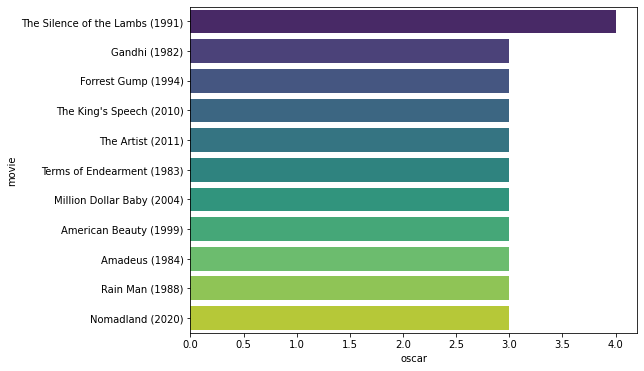

In [7]:
plt.figure(figsize=(8, 6))
plt.xlabel('Number of Oscards')
plt.ylabel('Movie')
sns.barplot(
    data=top_oscar, 
    y='movie', x='oscar',
    orient='h', palette='viridis'
)
plt.show()

### Average runtime

In [8]:
average_runtime = np.round(df['runtime'].mean(), 3)
average_runtime_winners = np.round(df[df.oscar == 1]['runtime'].mean(), 3)
print('All:', average_runtime, '\nWinners:', average_runtime_winners)

All: 127.165 
Winners: 132.087


### Top nominated (in total)

In [9]:
nominated_top = df[['movie', 'year', 'other_nom']].\
    drop_duplicates().\
    sort_values(by='other_nom', ascending=False)
nominated_top.head(10)

,movie,year,other_nom
601,The Shape of Water,2017,352
610,The Favourite,2018,336
328,12 Years a Slave,2013,336
744,Moonlight,2016,292
782,Birdman or (The Unexpected Virtue of Ignorance),2014,291
355,La La Land,2016,287
552,Black Swan,2010,279
378,A Star Is Born,2018,278
789,Black Panther,2018,275
386,Marriage Story,2019,269


### Correlation with Oscar

In [10]:
def plot_corr_matrix(columns: list[str]) -> None:
    data = df[['oscar', *columns]]
    sns.heatmap(data=data.corr(), annot=True, fmt='.3f')
    plt.show()

#### BAFTA & Golden Globe

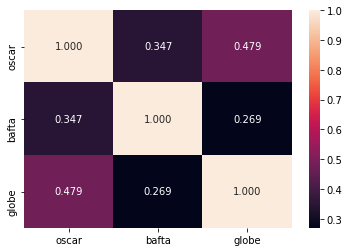

In [11]:
plot_corr_matrix(['bafta', 'globe'])

#### Scores from RT, IMDB, Metacritic

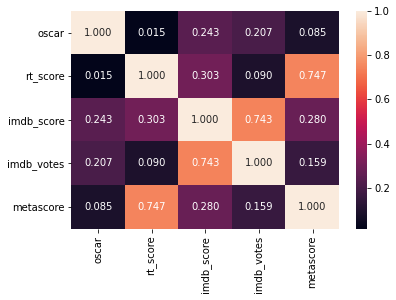

In [12]:
plot_corr_matrix(['rt_score', 'imdb_score', 'imdb_votes', 'metascore'])

#### Number of other wins & nominations

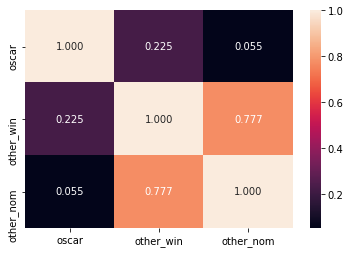

In [13]:
plot_corr_matrix(['other_win', 'other_nom'])

#### Runtime & Rating & Director

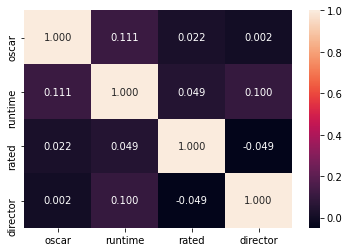

In [14]:
le = LabelEncoder()

df['rated'] = le.fit_transform(df.rated)
df['director'] = le.fit_transform(df.director)
plot_corr_matrix(['runtime', 'rated', 'director'])

#### Genres

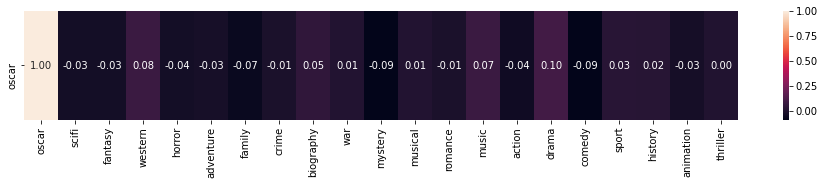

In [15]:
plt.figure(figsize=(16, 2))
data = df[['oscar', *genres]]
sns.heatmap(data=data.corr()[:1], annot=True, fmt='.2f')
plt.show()

#### Important only

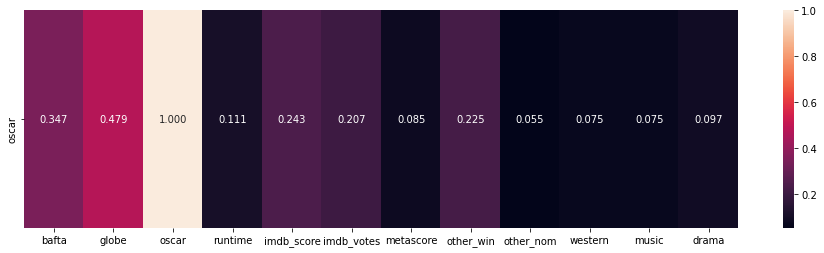

In [16]:
corr = df.corr()
mask = np.abs(corr['oscar'] > 0.05)
corr = corr[corr.columns[mask]]

plt.figure(figsize=(16, 4))
sns.heatmap(data=corr[corr.index == 'oscar'], annot=True, fmt='.3f')
plt.show()